# Project - Zuber Ride Analysis

## Purpose

To analyze data from the Zuber ride sharing company Chicago based and understand patterns in passenger prefrences and the impact on external factors on rides. 

Information available in each data set consists of:

**Dataset 1:**
- Containg information on taxy company names and the amount of rides for each company on November 15-16, 2017.

**Dataset 2:**
- Containing the average of amount of rides that ended in each neighborhood on November 2017.

**Dataset 3:**
- Containing information on the duration of seconds and weather conditions for every ride made from Loop to O'Hare International Airport on Saturdays of November 2017.

### Initialization 

Import necessary libraries.

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

### Load Data

In [49]:
# load data into variables
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
Loop_OHare_data = pd.read_csv('/datasets/project_sql_result_07.csv')

### Data Review

We will commence by reviewing the datasets' structure and information for a better understanding an to find possible corrections to be made in the data.

Company trips dataset: 

In [50]:
# Display data and information 
company_trips.info()
display(company_trips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


`company_trips` dataset contains a total of 64 rows with no null values, data types appear to be correct.

Dropoff dataset:

In [51]:
# Display data and information 
dropoff_data.info()
display(dropoff_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


`dropoff_data` set contains 94 rows with no null values, data types also appear to be correct.

Loop to O'Hare dataset:

In [52]:
# Display data and information 
Loop_OHare_data.info()
display(Loop_OHare_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


`Loop_OHare` data contains 1068 rows with no null values, data types are correct.

## Data Preprocessing

### Checking for duplicates

Our data sets appear to have no null values, we will however check for duplicates before working with it.

In [53]:
# Check for duplicates
print("Number of duplicates in company_trips:", company_trips.duplicated().sum())
print("Number of duplicates in dropoff_data:", dropoff_data.duplicated().sum())
print("Number of duplicates in Loop_OHare_data:",Loop_OHare_data.duplicated().sum())

Number of duplicates in company_trips: 0
Number of duplicates in dropoff_data: 0
Number of duplicates in Loop_OHare_data: 197


Our data shows 197 missing from the Loop_OHare_data, we will be removing these duplicates.

In [62]:
# Drop duplicates
Loop_OHare_data.drop_duplicates(inplace=True)

## EDA 

We will now analyze both the `company_names` and `dropoff_data` information to find patterns in rides accross companies and neighborhoods.

### Neighborhood Analysis by Drop-offs

We will be using the dropoffs dataset to find the **top ten** Chicago neighborhoods in terms of drop-offs from November 2017.

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


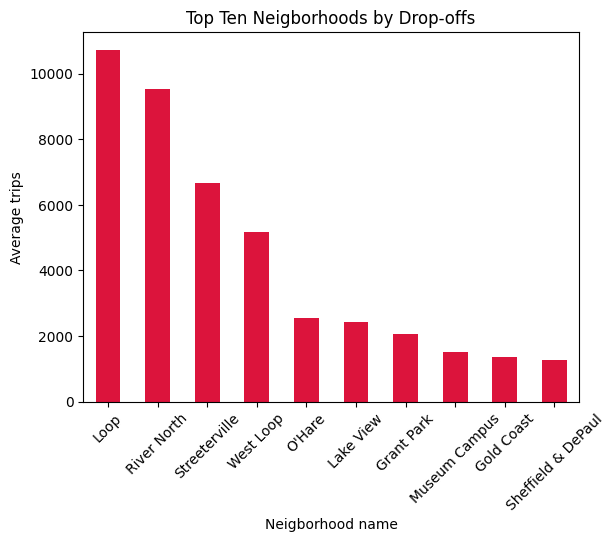

In [55]:
# Find and display Top ten neighborhoods
top_ten_neighborhoods = dropoff_data.head(10)
display(top_ten_neighborhoods)

#Plot top ten neighborhoods
top_ten_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips',
             title="Top Ten Neigborhoods by Drop-offs",
             xlabel="Neigborhood name",
             ylabel="Average trips",
             legend=False,
             color="crimson")

plt.xticks(rotation=45)
plt.show()

Our data shows Loop neighborhood is the highest dropoff site in chicago for taxi rides at an average on above 10,000 rides, followed by River North and Streeterville. Sheffield & DePaul occupies the 10 and last place in terms on average taxi rides with an average of less than 2000 rides.

### Companies Analysis by Trip Amount

Similarly we will now focus on finding the **top ten** companies in Chicago based of amount of trips registered per company.

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


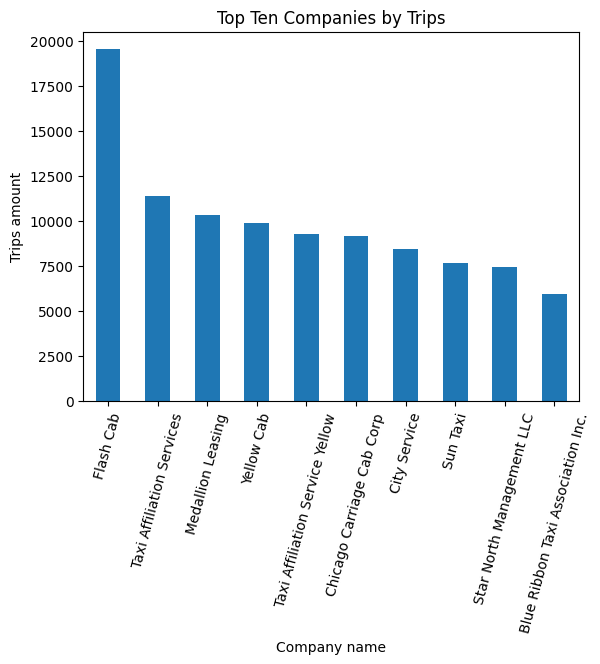

In [56]:
# Sort and display top ten companies
companies_sorted = company_trips.sort_values(by='trips_amount', ascending=False).head(10)
display(companies_sorted)

# Plot top ten companies
companies_sorted.plot(kind='bar', x='company_name', y='trips_amount',
             title="Top Ten Companies by Trips",
             xlabel="Company name",
             ylabel="Trips amount",
             legend=False)

plt.xticks(rotation=75)
plt.show()

Our data shows Flash Cab with close to 20,000 resgisted as the highest provider with Taxi Affilitation Services in second with around 11,000 rides. Our graph clearly shows Flash Cab providing at least 8,000 more rides than its competitors.

## Statistical Analysis

Using our third dataset (`Loop_OHare`) we will now conduct statistical comparison of data. Our main concern is to observe wheather the average duration of rides from Loop to O'Hare changes on rainy Saturdays.

The dataset's `weather_conditions` field classifies weather on two categories "Good" and "Bad" the latter being days involving rain. And so we must begin by filtering for data to cross-compare both weather categories.

In [57]:
# Filter data
bad_weather = Loop_OHare_data[Loop_OHare_data['weather_conditions'] == 'Bad']
good_weather = Loop_OHare_data[Loop_OHare_data['weather_conditions'] == 'Good']

To accurately compare the data we will be using a statictical t-test where:

* null hypothesis: rainy weather ride duration == good weather ride duration
* alternatice hypothesis: rainy weather ride duration != good weather ride duration

To be precise we will set the **alpha value** of 0.05 to ensure a 95% confidence interval.

In [61]:
ride_duration_test = st.ttest_ind(bad_weather['duration_seconds'], good_weather['duration_seconds'])

#Set alpha
alpha = 0.05

print("Ride duration test p-value:", ride_duration_test.pvalue )

print()

if ride_duration_test.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

Ride duration test p-value: 7.397770692813658e-08

We reject the null hypothesis.


Our test results in a p-value of less than 0.00, and so we **reject the null hypothesis**  and lean towards the alternative which states ride durations from Loop neighborhood to O'Hare International Airport changes on rainy saturdays.

## Conculsion

Based on our results we can draw several conculsions such as:

* Flash Cab is the most succesfull ride provider in Chicago for November 2017 by a substantial amount above its competitors.
* Loop, River North and Streeterville possess the highest average dropoff rates for neighborhoods on November 15-16, 2017.
* Taxi ride duration for neighborhood Loop to O'Hare international airport does in fact take longer on rainy saturdays.